## Estado del Arte

### Embeddings en NLP

Los embeddings son una técnica fundamental en el procesamiento de lenguaje natural (NLP) que permite representar palabras, frases o documentos como vectores en un espacio de alta dimensionalidad. Esta representación es crucial para que los algoritmos de aprendizaje automático puedan procesar y analizar el texto de manera efectiva.

#### One-Hot vectors
Let $N$ be the size of the dictionary we are using. In this model we map every word to a vector of dimension $N$ which is 0 in every component but one. 
- Pro: Easy to construct
- Con: It can not express similirity between words since the difference between words would always be 0 in all components but 1 and -1.
#### Word2Vec

Word2Vec is a technique in natural language processing (NLP) that uses neural networks to generate vector representations of words, capturing their meanings based on context. Developed by Tomáš Mikolov and colleagues at Google in 2013, Word2Vec can utilize either of two model architectures: Continuous Bag of Words (CBOW) and Skip-gram.
1. CBOW Model:
    - Goal: Predict a target word from its context words.
    - Architecture:
        1. Input Layer: Context words surrounding the target word.
        2. Hidden Layer: Embeds context words into a continuous vector space.
        3. Output Layer: Predicts the target word.
2. Skip-gram Model:
    - Goal: Predict context words from a target word.
    - Architecture: Similar neural network structure but works inversely to CBOW, using the current word to predict surrounding context words.
        1. Input Layer: Target word.
        2. Hidden Layer: Embeds the target word into a continuous vector space.
        3. Output Layer: Predicts context words surrounding the target word.
#### Modelos de Lenguaje Modernos

Modelos de lenguaje modernos como BERT, GPT-3, `llama3`, y `phi3` utilizan embeddings contextuales, donde la representación de una palabra depende del contexto en el que aparece. Estos modelos han demostrado un rendimiento superior en diversas tareas de NLP debido a su capacidad para capturar matices contextuales complejos.

### Aplicaciones de Embeddings

Los embeddings se utilizan en una amplia gama de aplicaciones de NLP, incluyendo:

- **Clasificación de Texto**: Los embeddings permiten convertir texto en una forma que los algoritmos de clasificación pueden procesar eficientemente.
- **Análisis de Sentimiento**: Representar palabras y frases como vectores facilita la identificación de emociones y opiniones en el texto.
- **Extracción de Información**: Los embeddings son útiles para identificar entidades y relaciones clave en grandes corpus de texto.

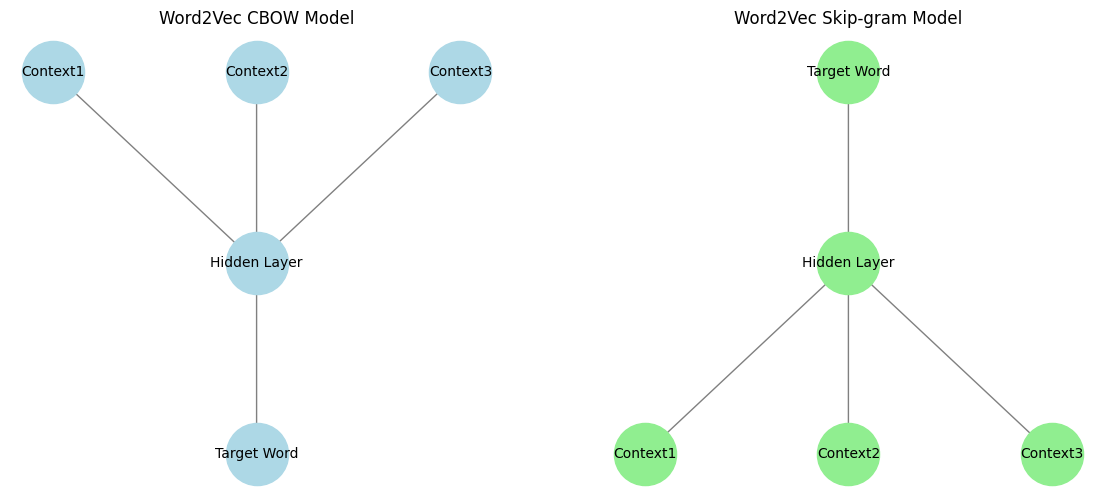

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Create the CBOW diagram
G_cbow = nx.DiGraph()
G_cbow.add_node("Context1", pos=(0, 2))
G_cbow.add_node("Context2", pos=(2, 2))
G_cbow.add_node("Context3", pos=(4, 2))
G_cbow.add_node("Hidden", pos=(2, 1))
G_cbow.add_node("Target", pos=(2, 0))

# Add edges
G_cbow.add_edges_from([("Context1", "Hidden"), ("Context2", "Hidden"), ("Context3", "Hidden"), ("Hidden", "Target")])

# Define positions for nodes
pos_cbow = nx.get_node_attributes(G_cbow, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G_cbow, pos_cbow, node_size=2000, node_color="lightblue", ax=axs[0])

# Draw the edges
nx.draw_networkx_edges(G_cbow, pos_cbow, edgelist=G_cbow.edges(), arrowstyle='->', arrowsize=20, edge_color="gray", ax=axs[0])

# Draw the labels
labels_cbow = {
    "Context1": "Context1",
    "Context2": "Context2",
    "Context3": "Context3",
    "Hidden": "Hidden Layer",
    "Target": "Target Word"
}
nx.draw_networkx_labels(G_cbow, pos_cbow, labels_cbow, font_size=10, font_color="black", ax=axs[0])

# Title
axs[0].set_title("Word2Vec CBOW Model")
axs[0].axis('off')

# Create the Skip-gram diagram
G_skip = nx.DiGraph()
G_skip.add_node("Target", pos=(2, 2))
G_skip.add_node("Hidden", pos=(2, 1))
G_skip.add_node("Context1", pos=(0, 0))
G_skip.add_node("Context2", pos=(2, 0))
G_skip.add_node("Context3", pos=(4, 0))

# Add edges
G_skip.add_edges_from([("Target", "Hidden"), ("Hidden", "Context1"), ("Hidden", "Context2"), ("Hidden", "Context3")])

# Define positions for nodes
pos_skip = nx.get_node_attributes(G_skip, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G_skip, pos_skip, node_size=2000, node_color="lightgreen", ax=axs[1])

# Draw the edges
nx.draw_networkx_edges(G_skip, pos_skip, edgelist=G_skip.edges(), arrowstyle='->', arrowsize=20, edge_color="gray", ax=axs[1])

# Draw the labels
labels_skip = {
    "Target": "Target Word",
    "Hidden": "Hidden Layer",
    "Context1": "Context1",
    "Context2": "Context2",
    "Context3": "Context3"
}
nx.draw_networkx_labels(G_skip, pos_skip, labels_skip, font_size=10, font_color="black", ax=axs[1])

# Title
axs[1].set_title("Word2Vec Skip-gram Model")
axs[1].axis('off')

plt.show()

# llama3, phi3 y word2vec embeddings

In [4]:
import ollama
def get_llama3_embedding(text):
        """Generate an embedding for the provided text using the 'llama3' model."""
        embedding_dict = ollama.embeddings(model="llama3", prompt=text)
        vector = embedding_dict['embedding']
        return vector

In [5]:
def get_phi3_embedding(text):
        """Generate an embedding for the provided text using the 'llama3' model."""
        embedding_dict = ollama.embeddings(model="phi3", prompt=text)
        vector = embedding_dict['embedding']
        return vector

In [6]:
import gensim.downloader as api

# Descargar y cargar el modelo pre-entrenado de Word2Vec
word2vec_model = api.load("word2vec-google-news-300")

In [72]:
def get_word2vec_embedding(word):
    return word2vec_model[word]

## PCA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Palabras para las cuales obtener embeddings
# words = ["man", "woman", "king", "queen", "sister", "brother"]
words = ["man", "woman", "uncle", "aunt"]
# Obtener embeddings de llama3
llama3_embeddings = np.array([get_llama3_embedding(word) for word in words])

print(f"Dimension of llama3 embeddings: {llama3_embeddings[0].shape}")

Dimension of llama3 embeddings: (4096,)


In [9]:
# Obtener embeddings de phi3
phi3_embeddings = np.array([get_phi3_embedding(word) for word in words])

print(f"Dimension of phi3 embeddings: {phi3_embeddings[0].shape}")

Dimension of phi3 embeddings: (3072,)


In [10]:
# Obtener embeddings de Word2Vec
word2vec_embeddings = np.array([get_word2vec_embedding(word) for word in words])

print(f"Dimension of Word2Vec embeddings: {word2vec_embeddings[0].shape}")

Dimension of Word2Vec embeddings: (300,)


Ollama dos dimensiones solo

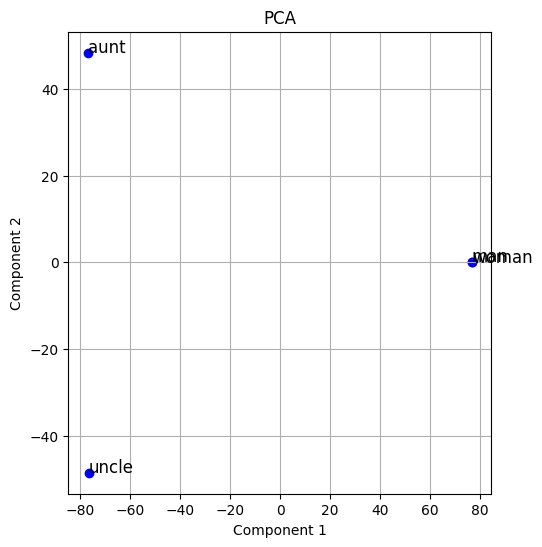

In [11]:
# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(llama3_embeddings)


# Visualizar con PCA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], color='blue')
for i, word in enumerate(words):
    plt.annotate(word, (embedding_pca[i, 0], embedding_pca[i, 1]), fontsize=12)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)

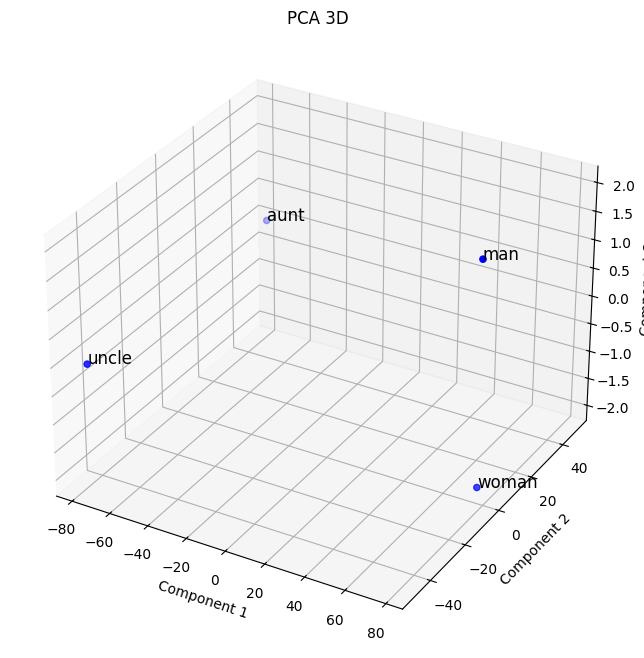

In [12]:
# Reducir la dimensionalidad con PCA a 3 componentes
pca = PCA(n_components=3)
embedding_pca = pca.fit_transform(llama3_embeddings)

# Visualizar con PCA en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embedding_pca[:, 0], embedding_pca[:, 1], embedding_pca[:, 2], c='blue')

for i, word in enumerate(words):
    ax.text(embedding_pca[i, 0], embedding_pca[i, 1], embedding_pca[i, 2], word, fontsize=12)

ax.set_title('PCA 3D')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

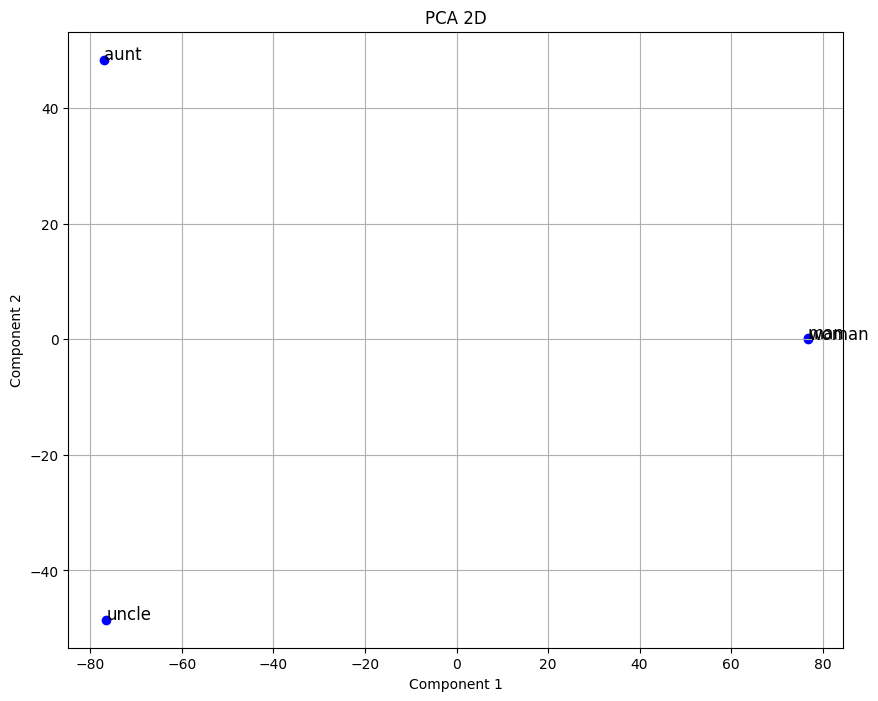

In [13]:
# Reducir la dimensionalidad con PCA a 2 componentes
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(llama3_embeddings)

# Visualizar con PCA en 2D
plt.figure(figsize=(10, 8))
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c='blue')

for i, word in enumerate(words):
    plt.annotate(word, (embedding_pca[i, 0], embedding_pca[i, 1]), fontsize=12)

plt.title('PCA 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

ollama con word2vec juntos

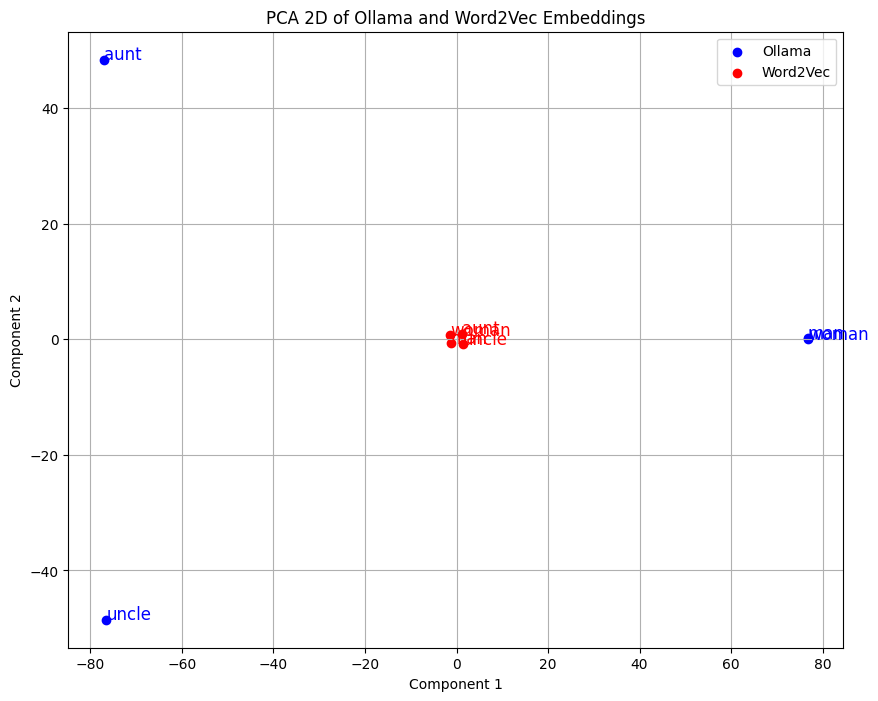

In [14]:
# Reducir la dimensionalidad con PCA a 2 componentes para cada conjunto de embeddings
pca = PCA(n_components=2)
ollama_pca = pca.fit_transform(llama3_embeddings)
word2vec_pca = pca.fit_transform(word2vec_embeddings)

# Visualizar con PCA en 2D
plt.figure(figsize=(10, 8))

plt.scatter(ollama_pca[:, 0], ollama_pca[:, 1], c='blue', label='Ollama')
for i, word in enumerate(words):
    plt.annotate(word, (ollama_pca[i, 0], ollama_pca[i, 1]), fontsize=12, color='blue')

plt.scatter(word2vec_pca[:, 0], word2vec_pca[:, 1], c='red', label='Word2Vec')
for i, word in enumerate(words):
    plt.annotate(word, (word2vec_pca[i, 0], word2vec_pca[i, 1]), fontsize=12, color='red')

plt.title('PCA 2D of Ollama and Word2Vec Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

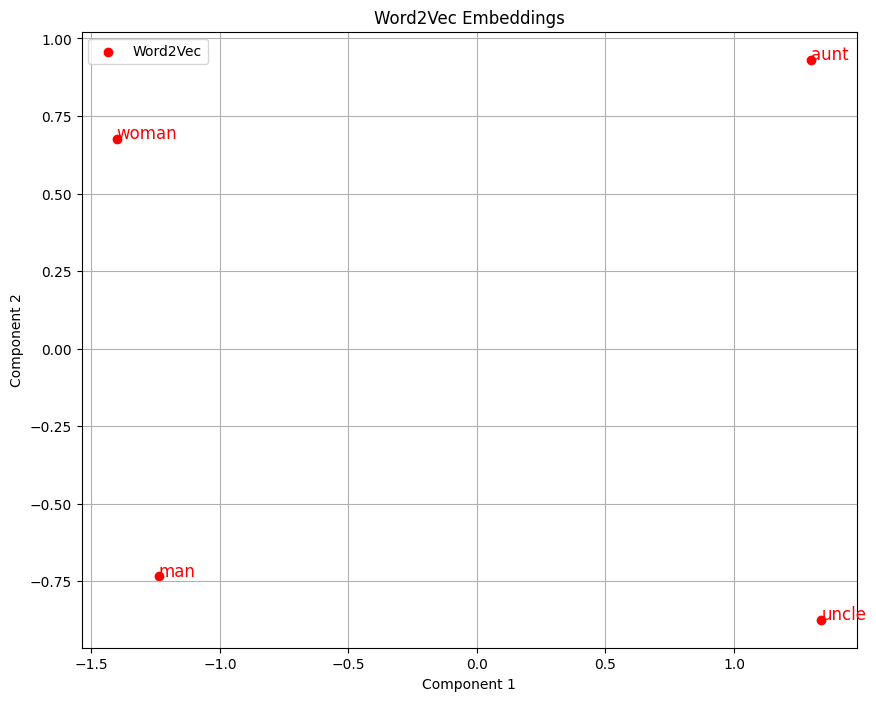

In [15]:
# Visualizar con PCA en 2D
plt.figure(figsize=(10, 8))

plt.scatter(word2vec_pca[:, 0], word2vec_pca[:, 1], c='red', label='Word2Vec')
for i, word in enumerate(words):
    plt.annotate(word, (word2vec_pca[i, 0], word2vec_pca[i, 1]), fontsize=12, color='red')

plt.title('Word2Vec Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

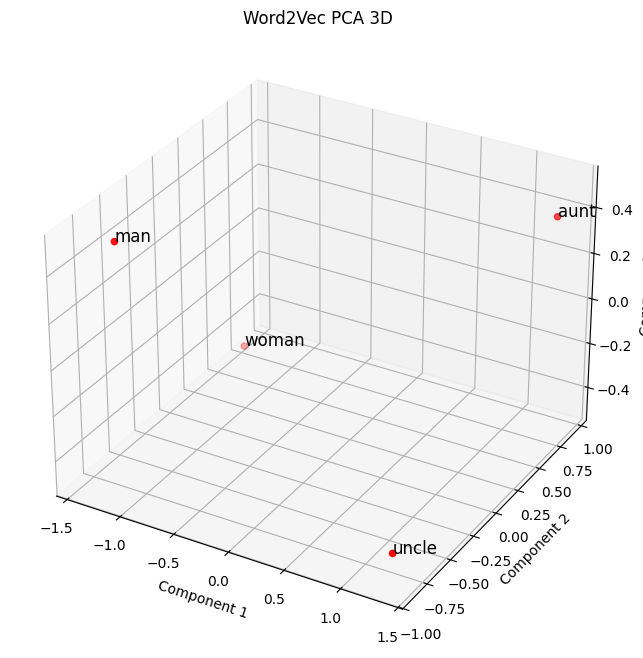

In [16]:
# word2vec PCA 3D
pca = PCA(n_components=3)
word2vec_pca = pca.fit_transform(word2vec_embeddings)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(word2vec_pca[:, 0], word2vec_pca[:, 1], word2vec_pca[:, 2], c='red')

for i, word in enumerate(words):
    ax.text(word2vec_pca[i, 0], word2vec_pca[i, 1], word2vec_pca[i, 2], word, fontsize=12)

ax.set_title('Word2Vec PCA 3D')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

Normalizamos los datos

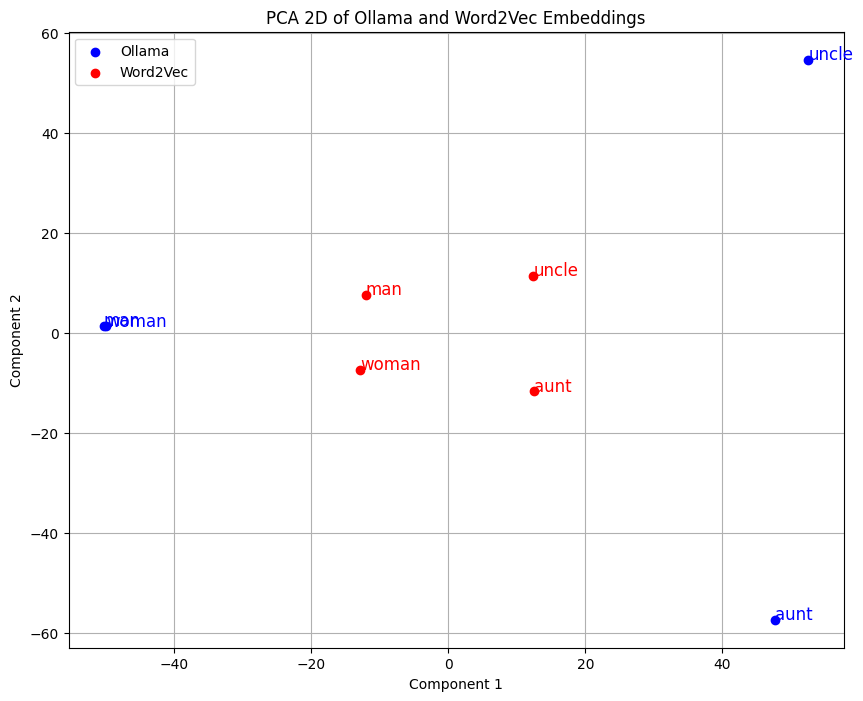

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalizar los embeddings
scaler = StandardScaler()
ollama_embeddings_scaled = scaler.fit_transform(llama3_embeddings)
word2vec_embeddings_scaled = scaler.fit_transform(word2vec_embeddings)

# Reducir la dimensionalidad con PCA a 2 componentes para cada conjunto de embeddings
pca = PCA(n_components=2)
ollama_pca = pca.fit_transform(ollama_embeddings_scaled)
word2vec_pca = pca.fit_transform(word2vec_embeddings_scaled)

# Visualizar con PCA en 2D
plt.figure(figsize=(10, 8))

plt.scatter(ollama_pca[:, 0], ollama_pca[:, 1], c='blue', label='Ollama')
for i, word in enumerate(words):
    plt.annotate(word, (ollama_pca[i, 0], ollama_pca[i, 1]), fontsize=12, color='blue')

plt.scatter(word2vec_pca[:, 0], word2vec_pca[:, 1], c='red', label='Word2Vec')
for i, word in enumerate(words):
    plt.annotate(word, (word2vec_pca[i, 0], word2vec_pca[i, 1]), fontsize=12, color='red')

plt.title('PCA 2D of Ollama and Word2Vec Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Word analogy

https://d2l.ai/chapter_natural-language-processing-pretraining/similarity-analogy.html
https://code.google.com/archive/p/word2vec/

### llama3

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def get_analogy(word_a, word_b, word_c, embedding_function):
    """Find the word d that completes the analogy: a is to b as c is to d."""
    vec_a = np.array(embedding_function(word_a))
    vec_b = np.array(embedding_function(word_b))
    vec_c = np.array(embedding_function(word_c))

    analogy_vector = vec_b - vec_a + vec_c

    return analogy_vector

def find_closest_word(analogy_vector, embedding_function, vocabulary):
    """Find the word in the vocabulary whose embedding is closest to the analogy_vector."""
    max_similarity = -1
    closest_word = None
    
    for word in vocabulary:
        word_vector = np.array(embedding_function(word))
        similarity = cosine_similarity([analogy_vector], [word_vector])[0][0]
        
        if similarity > max_similarity:
            max_similarity = similarity
            closest_word = word
    
    return closest_word

In [19]:
# Example usage:
vocabulary = ["king", "queen", "man", "woman", "prince", "princess", "doctor", "nurse"]  # Example vocabulary
analogy_vector = get_analogy("king", "man", "queen", get_llama3_embedding)
closest_word = find_closest_word(analogy_vector, get_llama3_embedding, vocabulary)
print("The word completing the analogy is:", closest_word)

The word completing the analogy is: man


### word2vec

Given three words: $A$, $B$, $C$ we can do $vect(B) - vect(A)$ to try to get the direction which represents some meaning, then we sum it to $C$ and we find the closest word to the vector. So we try to find the closest word of $vect(C) + vect(B) - vect(A)$.

In [20]:
def get_analogy(word_a, word_b, word_c, embedding_function):
    """Find the word d that completes the analogy: a is to b as c is to d."""
    vec_a = np.array(embedding_function(word_a))
    vec_b = np.array(embedding_function(word_b))
    vec_c = np.array(embedding_function(word_c))

    analogy_vector = vec_b - vec_a + vec_c

    return analogy_vector

def find_closest_word(analogy_vector, embedding_function, vocabulary):
    """Find the word in the vocabulary whose embedding is closest to the analogy_vector."""
    vocabulary_vectors = np.array([embedding_function(word) for word in vocabulary if word in word2vec_model])
    similarities = cosine_similarity([analogy_vector], vocabulary_vectors)[0]
    closest_word = vocabulary[np.argmax(similarities)]
    
    return closest_word
# Tarda 1 min 10 seg en ejecutarse

In [21]:
# Example usage:
vocabulary = list(word2vec_model.index_to_key)  # Using the model's vocabulary
analogy_vector = get_analogy("man", "woman", "son", get_word2vec_embedding)
closest_word = find_closest_word(analogy_vector, get_word2vec_embedding, vocabulary)
print("The word completing the analogy is:", closest_word)

The word completing the analogy is: daughter


In [22]:
analogy_vector = get_analogy('do', 'did', 'go', get_word2vec_embedding)
closest_word = find_closest_word(analogy_vector, get_word2vec_embedding, vocabulary)
print("The word completing the analogy is:", closest_word)

The word completing the analogy is: went


In [23]:
analogy_vector = get_analogy('Germany', 'Berlin', 'Spain', get_word2vec_embedding)
closest_word = find_closest_word(analogy_vector, get_word2vec_embedding, vocabulary)
print("The word completing the analogy is:", closest_word)

The word completing the analogy is: Madrid


In [24]:
analogy_vector = get_analogy('Google', 'Gmail', 'Microsoft', get_word2vec_embedding)
closest_word = find_closest_word(analogy_vector, get_word2vec_embedding, vocabulary)
print("The word completing the analogy is:", closest_word)

The word completing the analogy is: Gmail


If the analogy word did not need to find the closest word but it were exact instead, then we would have a linear relation. Thus, given a set of words we can say that

## Given Words A, B, C, D

D is an analogy of A, B, C:
$$ D = \left( \begin{array}{c} -1 \\ 1 \end{array} \right)_{d_{A,B,C}} $$
$$
\text{vec}(D) \approx \text{vec}(C) + \text{vec}(B) - \text{vec}(A)
$$
$$
D \in \langle A, B, C \rangle
$$

Let $( E \in \langle A, B, C \rangle )$:
$ E = \alpha A + \beta B + \gamma C $

Then, $( E )$ is an analogy of $( \forall A, B, C, \phi )$ (where $( \alpha = -1, \beta = 1, \gamma = 1 )$)

$$
\begin{aligned}
e_1 &= \alpha a_1 + \beta b_1 + \gamma c_1 \\
e_2 &= \alpha a_2 + \beta b_2 + \gamma c_2 \\
e_3 &= \alpha a_3 + \beta b_3 + \gamma c_3
\end{aligned}
\implies
E = \left( \begin{array}{ccc} A & B & C \end{array} \right)
\left( \begin{array}{c} \alpha \\ \beta \\ \gamma \end{array} \right)
$$

Since analogy cannot be exact, we will define it as an analogy if:
$$ d\left( \left( \begin{array}{c} \alpha \\ \beta \\ \gamma \end{array} \right), \left( \begin{array}{c} -1 \\ 1 \\ 1 \end{array} \right) \right) < \varepsilon $$


## Subspaces

Recall that given a set of vectors $X = v_1,...,v_n$ we can generate a subspace $M = <v_1,...,v_n>$ so $X$ is called the spanning set. If $X$ is a linear independent set it would be called a basis of $M$. 
**Recall propeties**
- if $X$ is a spanning set of $M$ but not a basis we can always remove some $v_i$ to make it a basis.
- projection
- linear independent

In [25]:
import numpy as np

def check_vector_in_subspace(vectors, new_vector):
    """
    Check if the new_vector belongs to the subspace generated by the given vectors.
    
    Parameters:
    vectors (list of list of floats): A list of vectors that generate the subspace.
    new_vector (list of floats): The vector to check.

    Returns:
    bool: True if new_vector is in the subspace, False otherwise.
    """
    # Convert input vectors to a numpy array
    matrix = np.array(vectors).T
    new_vector = np.array(new_vector)
    
    # Check if the dimensions match
    if matrix.shape[0] != new_vector.shape[0]:
        raise ValueError("Dimension mismatch between vectors and new_vector.")
    
    # Create the augmented matrix by adding the new_vector as the last column
    augmented_matrix = np.column_stack((matrix, new_vector))
    
    # Compute the ranks
    original_rank = np.linalg.matrix_rank(matrix)
    augmented_rank = np.linalg.matrix_rank(augmented_matrix)
    
    # The new vector belongs to the subspace if the ranks are equal
    return original_rank == augmented_rank

In [26]:
def check_word_in_subspace(word_list, target_word, embedding_function):
    """
    Check if the target_word belongs to the subspace generated by the list of words.
    
    Parameters:
    word_list (list of str): A list of words that generate the subspace.
    target_word (str): The word to check.
    embedding_function (function): Function to convert words to vectors.

    Returns:
    bool: True if target_word is in the subspace, False otherwise.
    """
    vectors = [embedding_function(word) for word in word_list]
    target_vector = embedding_function(target_word)
    
    return check_vector_in_subspace(vectors, target_vector)

We can see that none of the following examples are not valid since the analogy word is not an exact 

In [33]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Europe"
is_in_subspace = check_word_in_subspace(word_list, target_word, get_word2vec_embedding)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'Europe' belong to the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria']? False


In [35]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Sweden"
is_in_subspace = check_word_in_subspace(word_list, target_word, get_word2vec_embedding)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'Sweden' belong to the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria']? False


In [36]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Poland"
is_in_subspace = check_word_in_subspace(word_list, target_word, get_word2vec_embedding)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'Poland' belong to the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria']? False


In [37]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Poland"
is_in_subspace = check_word_in_subspace(word_list, target_word, get_llama3_embedding)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'Poland' belong to the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria']? False


In [38]:
word_list = ["king", "man", "queen"]
target_word = "woman"
is_in_subspace = check_word_in_subspace(word_list, target_word, get_word2vec_embedding)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'woman' belong to the subspace generated by ['king', 'man', 'queen']? False


In [49]:
def project_vector_to_subspace(vectors, new_vector):
    """
    Project the new_vector onto the subspace generated by the given vectors.
    
    Parameters:
    vectors (list of list of floats): A list of vectors that generate the subspace.
    new_vector (list of floats): The vector to project.

    Returns:
    np.ndarray: The projection of the new_vector onto the subspace.
    """
    matrix = np.array(vectors).T
    new_vector = np.array(new_vector)
    
    # Check if the dimensions match
    if matrix.shape[0] != new_vector.shape[0]:
        raise ValueError("Dimension mismatch between vectors and new_vector.")
    
    # Compute the projection matrix P = A(A^T A)^-1 A^T
    projection_matrix = matrix @ np.linalg.pinv(matrix.T @ matrix) @ matrix.T
    
    # Project the new vector onto the subspace
    projected_vector = projection_matrix @ new_vector
    
    return projected_vector

def close_enough(vectors, new_vector, threshold):
    """
    Check if the new_vector belongs to the subspace generated by the given vectors
    by projecting it onto the subspace and measuring the distance.
    
    Parameters:
    vectors (list of list of floats): A list of vectors that generate the subspace.
    new_vector (list of floats): The vector to check.
    threshold (float): The maximum allowable distance for the new_vector to be considered in the subspace.

    Returns:
    bool: True if the distance from new_vector to its projection is within the threshold, False otherwise.
    """
    new_vector = np.array(new_vector)
    projected_vector = project_vector_to_subspace(vectors, new_vector)
    
    # Calculate the distance between the new vector and its projection
    distance = np.linalg.norm(new_vector - projected_vector)
    
    # Check if the distance is within the threshold
    return distance <= threshold

In [57]:
def check_word_close_subspace(word_list, target_word, embedding_function, threshold=2.3):
    """
    Check if the target_word belongs to the subspace generated by the list of words.
    
    Parameters:
    word_list (list of str): A list of words that generate the subspace.
    target_word (str): The word to check.
    embedding_function (function): Function to convert words to vectors.

    Returns:
    bool: True if target_word is close enough to the subspace, False otherwise.
    """
    vectors = [embedding_function(word) for word in word_list]
    target_vector = embedding_function(target_word)
    
    return close_enough(vectors, target_vector, threshold)

In [58]:
# We have the vector king - man + queen. We want to calculate the distance between this vector and the vector for woman

analogy_vector = get_analogy("king", "man", "queen", get_word2vec_embedding)

# Get the vector for woman

woman_vector = get_word2vec_embedding("woman")

print("Distance between the analogy vector and the vector is:", np.linalg.norm(analogy_vector - woman_vector))

Distance between the analogy vector and the vector is: 2.298658


In [59]:
tower_vector = get_word2vec_embedding("tower")

print("Distance between the analogy vector and the vector is:", np.linalg.norm(analogy_vector - tower_vector))

Distance between the analogy vector and the vector is: 4.403329


In [61]:
word_list = ["king", "man", "queen"]
target_word = "woman"
is_in_subspace = check_word_close_subspace(word_list, target_word, get_word2vec_embedding, threshold=2.3)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'woman' belong to the subspace generated by ['king', 'man', 'queen']? True


In [63]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Poland"
is_in_subspace = check_word_close_subspace(word_list, target_word, get_word2vec_embedding, threshold=2.3)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'Poland' belong to the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria']? True


In [64]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Europe"
is_in_subspace = check_word_close_subspace(word_list, target_word, get_word2vec_embedding, threshold=2.3)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'Europe' belong to the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria']? True


In [62]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Poland"
is_in_subspace = check_word_close_subspace(word_list, target_word, get_llama3_embedding, threshold=2.3)
print(f"Does '{target_word}' belong to the subspace generated by {word_list}? {is_in_subspace}")

Does 'Poland' belong to the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria']? False


Finding the shortes word_list

In [66]:

from itertools import combinations

def project_vector_to_subspace(vectors, new_vector):
    """
    Project the new_vector onto the subspace generated by the given vectors.
    
    Parameters:
    vectors (list of np.ndarray): A list of vectors that generate the subspace.
    new_vector (np.ndarray): The vector to project.

    Returns:
    np.ndarray: The projection of the new_vector onto the subspace.
    """
    matrix = np.array(vectors).T
    
    # Compute the projection matrix P = A(A^T A)^-1 A^T
    projection_matrix = matrix @ np.linalg.pinv(matrix.T @ matrix) @ matrix.T
    
    # Project the new vector onto the subspace
    projected_vector = projection_matrix @ new_vector
    
    return projected_vector

def check_vector_close_subspace(vectors, new_vector, threshold=1e-10):
    """
    Check if the new_vector belongs to the subspace generated by the given vectors
    by projecting it onto the subspace and measuring the distance.
    
    Parameters:
    vectors (list of np.ndarray): A list of vectors that generate the subspace.
    new_vector (np.ndarray): The vector to check.
    threshold (float): The maximum allowable distance for the new_vector to be considered in the subspace.

    Returns:
    bool: True if the distance from new_vector to its projection is within the threshold, False otherwise.
    """
    projected_vector = project_vector_to_subspace(vectors, new_vector)
    
    # Calculate the distance between the new vector and its projection
    distance = np.linalg.norm(new_vector - projected_vector)
    
    # Check if the distance is within the threshold
    return distance <= threshold


def find_smallest_subspace(word_list, target_word, embedding_function, threshold=1e-10):
    """
    Find the smallest subset of word_list such that the target_word belongs to the subspace generated by this subset.
    
    Parameters:
    word_list (list of str): A list of words that generate the subspace.
    target_word (str): The word to check.
    embedding_function (function): A function to get the word2vec embedding of a word.
    threshold (float): The maximum allowable distance for the target_word to be considered in the subspace.

    Returns:
    list of str: The smallest subset of word_list such that target_word belongs to its subspace.
    """
    target_vector = embedding_function(target_word)
    word_vectors = {word: embedding_function(word) for word in word_list}
    
    # Try subsets of increasing size until we find one that works
    for r in range(1, len(word_list) + 1):
        for subset in combinations(word_list, r):
            subset_vectors = [word_vectors[word] for word in subset]
            if check_vector_close_subspace(subset_vectors, target_vector, threshold):
                return list(subset)
    
    return []

In [70]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Europe"
threshold = 1.9
smallest_subspace = find_smallest_subspace(word_list, target_word, get_word2vec_embedding, threshold)
print(f"The smallest subset of {word_list} such that '{target_word}' belongs to its subspace: {smallest_subspace}")

The smallest subset of ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria'] such that 'Europe' belongs to its subspace: ['Germany', 'Italy', 'France', 'Greece']


In [ ]:
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
target_word = "Europe"
threshold = 1.9
smallest_subspace = find_smallest_subspace(word_list, target_word, get_word2vec_embedding, threshold)
print(f"The smallest subset of {word_list} such that '{target_word}' belongs to its subspace: {smallest_subspace}")

In [85]:
import numpy as np
from itertools import combinations

def euclidean_distance(vec1, vec2):
    """
    Calculate the Euclidean distance between two vectors.
    
    Parameters:
    vec1, vec2 (np.ndarray): The vectors to calculate the distance between.

    Returns:
    float: The Euclidean distance between vec1 and vec2.
    """
    return np.linalg.norm(vec1 - vec2)

def find_furthest_word(word_list, embedding_function, vocabulary):
    """Find the word in the vocabulary whose embedding is closest to the analogy_vector."""
    vector_list = [embedding_function(word) for word in word_list]
    furthest_word = None
    max_distance = -1

    for word in vocabulary:
        word_vector = embedding_function(word)
        max_distance_word = max([euclidean_distance(word_vector, vector) for vector in vector_list])
        if max_distance_word > max_distance:
            max_distance = max_distance_word
            furthest_word = word

    return furthest_word, max_distance

In [86]:
vocabulary = list(word2vec_model.index_to_key) 
word_list = ["Spain", "Germany", "Italy", "France", "Portugal", "Greece", "Austria"]
furthest_word, max_distance = find_furthest_word(word_list, get_word2vec_embedding, vocabulary)

print(f"The word in the vocabulary that is furthest from the subspace generated by {word_list} is '{furthest_word}' with a distance of {max_distance:.2f}")

The word in the vocabulary that is furthest from the subspace generated by ['Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Greece', 'Austria'] is 'delete_inappropriate_comments' with a distance of 21.46
